<a href="https://colab.research.google.com/github/Pranav8838/intern-task/blob/main/intern_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('student_data.csv')

In [ ]:
print(df.head())

   student_id           name  gender  age  math_score  science_score  \
0           1     John Smith    Male   15        78.0             82   
1           2  Emily Johnson  Female   16        92.0             88   
2           3  Michael Brown    Male   15        65.0             72   
3           4    Sarah Davis  Female   16        88.0             85   
4           5  Robert Wilson    Male   15        55.0             62   

   english_score  attendance_percentage  
0             88                     95  
1             94                     98  
2             68                     87  
3             90                     92  
4             58                     76  


In [ ]:
print(df.isnull().sum())

student_id               0
name                     0
gender                   0
age                      0
math_score               1
science_score            0
english_score            0
attendance_percentage    0
dtype: int64


In [ ]:
df['math_score'].fillna(df['math_score'].mean(),inplace=True)

<ipython-input-8-fa49f202deaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math_score'].fillna(df['math_score'].mean(),inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['average_score'] = (df['math_score'] + df['science_score'] + df['english_score']) / 3

NameError: name 'df' is not defined

In [ ]:
df['result']=df['average_score'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')

In [ ]:
def attendance_category(percentage):
    if percentage > 90:
        return "Good"
    elif percentage >= 75:
        return "Average"
    else:
        return "Poor"

df['attendance_category'] = df['attendance_percentage'].apply(attendance_category)

In [ ]:
print(df.head(2))

   student_id           name  gender  age  math_score  science_score  \
0           1     John Smith    Male   15        78.0             82   
1           2  Emily Johnson  Female   16        92.0             88   

   english_score  attendance_percentage  average_score result  \
0             88                     95      82.666667   Pass   
1             94                     98      91.333333   Pass   

  attendance_category  
0                Good  
1                Good  


In [ ]:
print(df.describe())

       student_id        age  math_score  science_score  english_score  \
count   15.000000  15.000000   15.000000      15.000000      15.000000   
mean     8.000000  15.466667   71.500000      74.333333      74.066667   
std      4.472136   0.516398   14.936772      12.081075      15.120784   
min      1.000000  15.000000   45.000000      51.000000      49.000000   
25%      4.500000  15.000000   62.000000      68.000000      63.000000   
50%      8.000000  15.000000   72.000000      78.000000      75.000000   
75%     11.500000  16.000000   82.500000      83.500000      87.000000   
max     15.000000  16.000000   92.000000      88.000000      94.000000   

       attendance_percentage  average_score  
count              15.000000      15.000000  
mean               86.666667      73.300000  
std                 9.499373      13.900468  
min                68.000000      48.333333  
25%                80.500000      65.166667  
50%                89.000000      75.000000  
75%        

In [ ]:
print(df.groupby('gender')['average_score'].mean())

gender
Female    81.428571
Male      66.187500
Name: average_score, dtype: float64


In [ ]:
print(df['result'].value_counts())

result
Pass    12
Fail     3
Name: count, dtype: int64


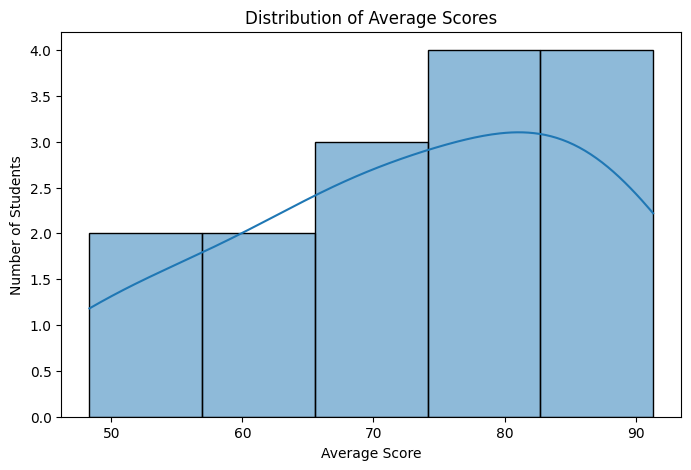

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['average_score'], bins=5, kde=True)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()

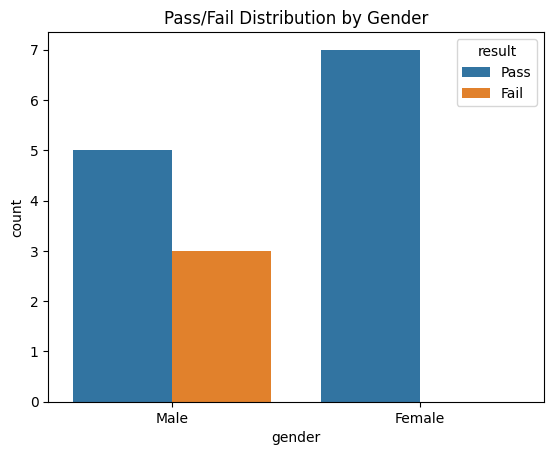

In [ ]:
sns.countplot(data=df, x='gender', hue='result')
plt.title("Pass/Fail Distribution by Gender")
plt.show()

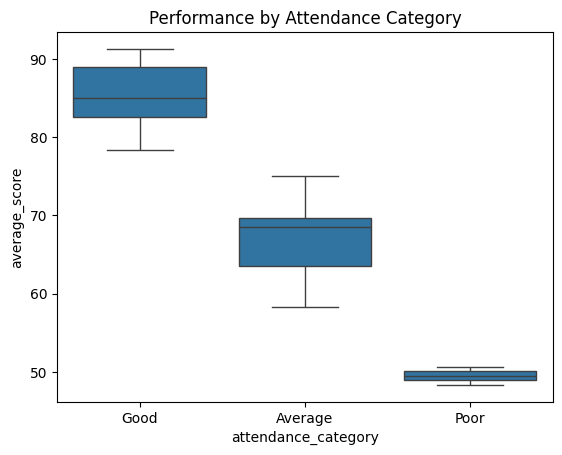

In [ ]:
sns.boxplot(data=df, x='attendance_category', y='average_score')
plt.title("Performance by Attendance Category")
plt.show()

In [ ]:
df.to_csv('cleaned_student_data.csv', index=False)

In [ ]:
plt.savefig('average_score_distribution.png')

<Figure size 640x480 with 0 Axes>